In [1]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('final_combined_toxicity_data_updated.csv')

# 1. Просмотр первых нескольких строк данных
print("Первые 5 строк данных:")
print(df.head())

# 2. Проверка размерности данных
print("\nРазмерность данных (строки, столбцы):")
print(df.shape)

# 3. Типы данных и наличие пропущенных значений
print("\nИнформация о данных:")
print(df.info())


C:\Users\bokar\AppData\Local\Temp\ipykernel_13000\1581304433.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_combined_toxicity_data_updated.csv')


Первые 5 строк данных:
      id                                       comment_text  toxic  \
0  59848  This is so cool. It's like, 'would you want yo...      0   
1  59849  Thank you!! This would make my life a lot less...      0   
2  59852  This is such an urgent design problem; kudos t...      0   
3  59855  Is this something I'll be able to install on m...      0   
4  59856               haha you guys are a bunch of losers.      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       1              0  

Размерность данных (строки, столбцы):
(3942562, 8)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942562 entries, 0 to 3942561
Data columns (total 8 columns):
 #   Column         Dt

In [ ]:
import pandas as pd
from langdetect import detect, LangDetectException
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('final_combined_toxicity_data_updated.csv')

# Функция для определения языка
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

# Параллельная обработка
def parallel_detect_language(texts):
    with Pool(cpu_count()) as pool:
        results = pool.map(detect_language, texts)
    return results

# Применяем функцию к столбцу comment_text (по частям, чтобы не перегружать память)
print("Определение языка для комментариев...")
chunk_size = 100000  # Размер части данных для обработки
languages = []
for i in range(0, len(df), chunk_size):
    chunk = df['comment_text'].iloc[i:i + chunk_size]
    languages.extend(parallel_detect_language(chunk))
    print(f"Обработано {i + chunk_size} строк из {len(df)}")

df['language'] = languages

# 1. Распределение языков
language_distribution = df['language'].value_counts()
print("\nРаспределение языков:")
print(language_distribution)

# 2. Топ-10 языков
top_languages = language_distribution.head(10)
print("\nТоп-10 языков:")
print(top_languages)

# 3. Анализ токсичности по языкам
toxic_by_language = df.groupby('language')[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].mean()
print("\nСредние значения меток токсичности по языкам:")
print(toxic_by_language)

# 4. Визуализация распределения языков
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar', color='skyblue')
plt.title('Топ-10 языков комментариев')
plt.xlabel('Язык')
plt.ylabel('Количество комментариев')
plt.show()

# 5. Визуализация токсичности по языкам
plt.figure(figsize=(10, 6))
toxic_by_language['toxic'].sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Топ-10 языков по доле токсичных комментариев')
plt.xlabel('Язык')
plt.ylabel('Доля токсичных комментариев')
plt.show()

C:\Users\bokar\AppData\Local\Temp\ipykernel_13000\700120474.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_combined_toxicity_data_updated.csv')


Определение языка для комментариев...


In [2]:
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isnull().sum())


Количество пропущенных значений в каждом столбце:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64



Статистика по длине текста:
count    3.942562e+06
mean     3.107745e+02
std      3.079714e+02
min      1.000000e+00
25%      9.600000e+01
50%      2.070000e+02
75%      4.260000e+02
max      8.095000e+03
Name: text_length, dtype: float64


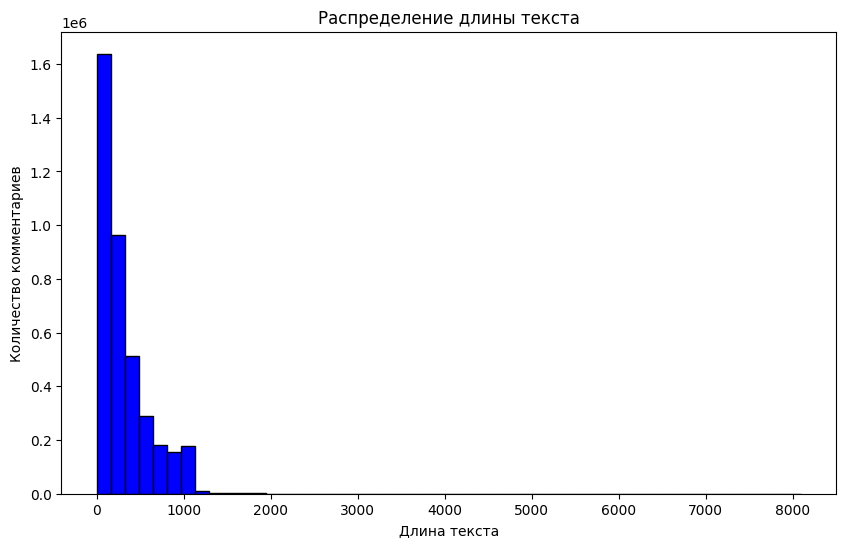


Комментарии с длиной текста больше 1089.0 (выбросы):
                                            comment_text  text_length
169    Am I missing something, because there's nothin...         1737
248    Predatory patrol towing isn't a big subject, a...         1906
401    I'm not a big fan of either, but I've seen bot...         1535
1894   As usual WW plumbing the depths for deeper mea...         1891
33197  I'm not a big fan of either, but I've seen bot...         1535


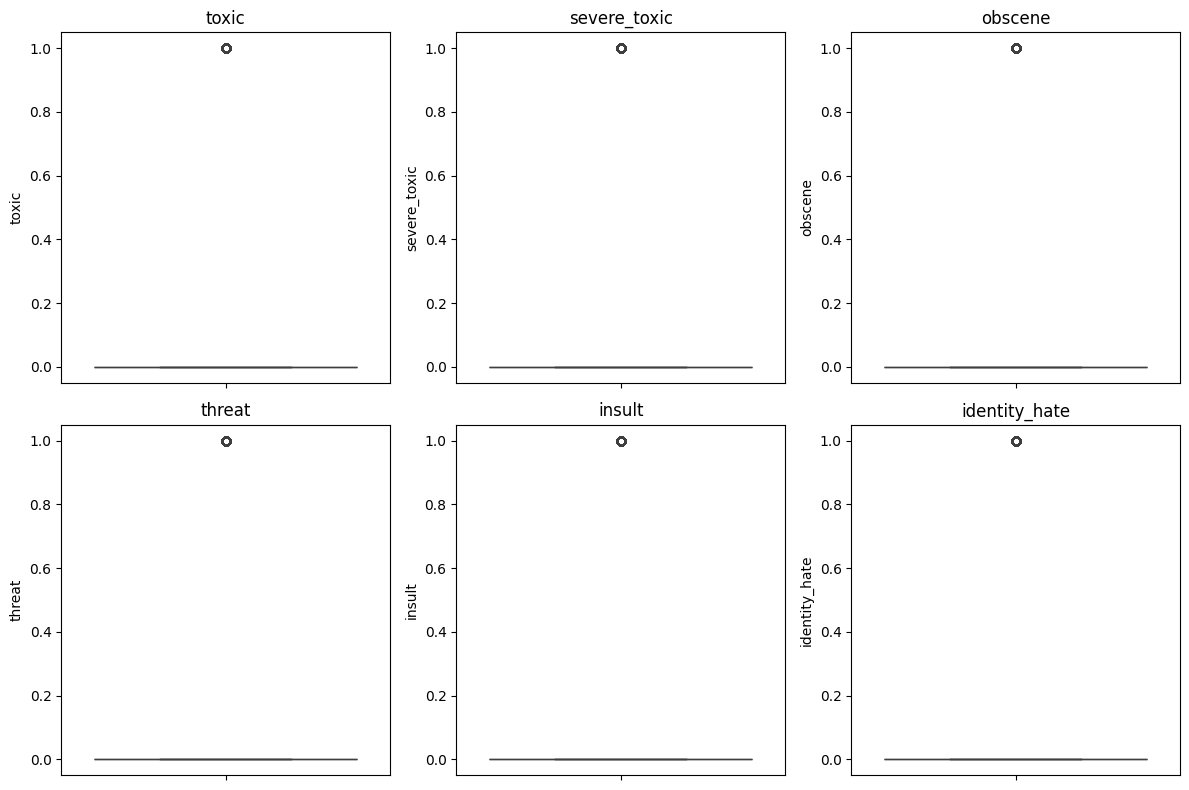


Статистика для столбца toxic:
toxic
0    3809536
1     133026
Name: count, dtype: int64

Статистика для столбца severe_toxic:
severe_toxic
0    3940600
1       1962
Name: count, dtype: int64

Статистика для столбца obscene:
obscene
0    3921429
1      21133
Name: count, dtype: int64

Статистика для столбца threat:
threat
0    3938901
1       3661
Name: count, dtype: int64

Статистика для столбца insult:
insult
0    3832714
1     109848
Name: count, dtype: int64

Статистика для столбца identity_hate:
identity_hate
0    3934006
1       8556
Name: count, dtype: int64

Комментарии с нестандартными символами (первые 5):
                                        comment_text
0  This is so cool. It's like, 'would you want yo...
1  Thank you!! This would make my life a lot less...
2  This is such an urgent design problem; kudos t...
3  Is this something I'll be able to install on m...
5                               ur a sh*tty comment.


In [3]:
import pandas as pd



# 1. Проверка текстовых данных на выбросы
def analyze_text_outliers(column):
    # Длина каждого комментария
    df['text_length'] = df[column].apply(len)
    
    # Статистика по длине текста
    print("\nСтатистика по длине текста:")
    print(df['text_length'].describe())
    
    # Визуализация распределения длины текста
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.hist(df['text_length'], bins=50, color='blue', edgecolor='black')
    plt.title('Распределение длины текста')
    plt.xlabel('Длина текста')
    plt.ylabel('Количество комментариев')
    plt.show()
    
    # Поиск выбросов (например, комментарии с длиной текста больше 99-го перцентиля)
    threshold = df['text_length'].quantile(0.99)
    outliers = df[df['text_length'] > threshold]
    print(f"\nКомментарии с длиной текста больше {threshold} (выбросы):")
    print(outliers[[column, 'text_length']].head())

# Анализ выбросов в столбце comment_text
analyze_text_outliers('comment_text')

# 2. Проверка числовых данных на выбросы
def analyze_numeric_outliers(df, numeric_columns):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Визуализация распределения числовых столбцов
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(y=df[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()
    
    # Поиск выбросов
    for column in numeric_columns:
        print(f"\nСтатистика для столбца {column}:")
        print(df[column].value_counts())

# Числовые столбцы
numeric_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
analyze_numeric_outliers(df, numeric_columns)

# 3. Проверка на нестандартные символы
def check_unusual_characters(column):
    import re
    
    # Регулярное выражение для поиска нестандартных символов
    unusual_pattern = re.compile(r'[^\w\s.,!?]')
    
    # Поиск комментариев с нестандартными символами
    df['unusual_chars'] = df[column].apply(lambda x: bool(unusual_pattern.search(x)))
    unusual_comments = df[df['unusual_chars']]
    
    print(f"\nКомментарии с нестандартными символами (первые 5):")
    print(unusual_comments[[column]].head())

# Проверка на нестандартные символы в comment_text
check_unusual_characters('comment_text')

In [2]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# 1. Просмотр первых нескольких строк данных
print("Первые 5 строк данных:")
print(df.head())

# 2. Проверка размерности данных
print("\nРазмерность данных (строки, столбцы):")
print(df.shape)

# 3. Типы данных и наличие пропущенных значений
print("\nИнформация о данных:")
print(df.info())

Первые 5 строк данных:
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  D'Оо! Он соответствует этому цвету фона, с кот...      0   
1  00025465d4725e87  "\n\nПоздравляю и меня, хорошо использую инстр...      0   
2  0009801bd85e5806  Смысл Mitsurugi не имеет смысла - почему бы не...      0   
3  00070ef96486d6f9  О, и девушка выше начала свои споры со мной. О...      0   
4  0007e25b2121310b  До свидания!\nНе смотри, приходи или думай о в...      1   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Размерность данных (строки, столбцы):
(223147, 8)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223147 entries, 0 t

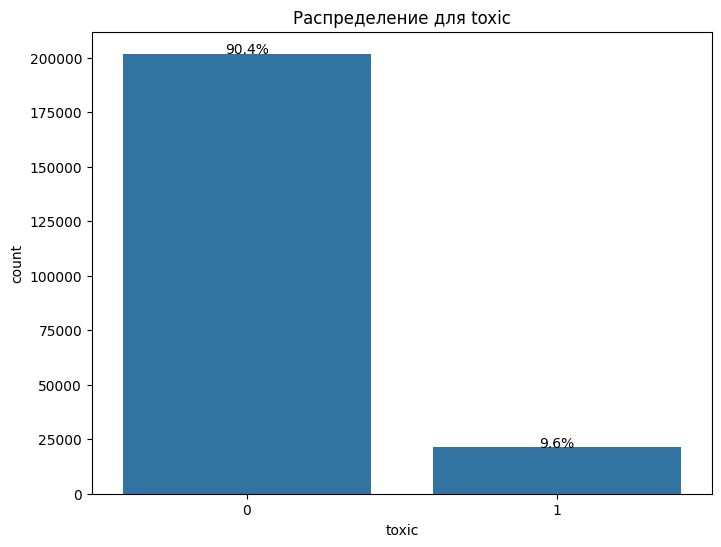

Распределение для toxic:
toxic
0    90.426938
1     9.573062
Name: proportion, dtype: float64


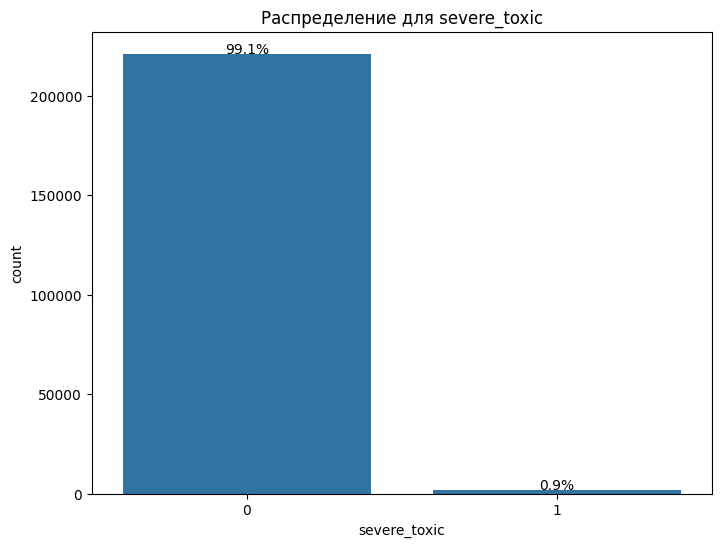

Распределение для severe_toxic:
severe_toxic
0    99.121655
1     0.878345
Name: proportion, dtype: float64


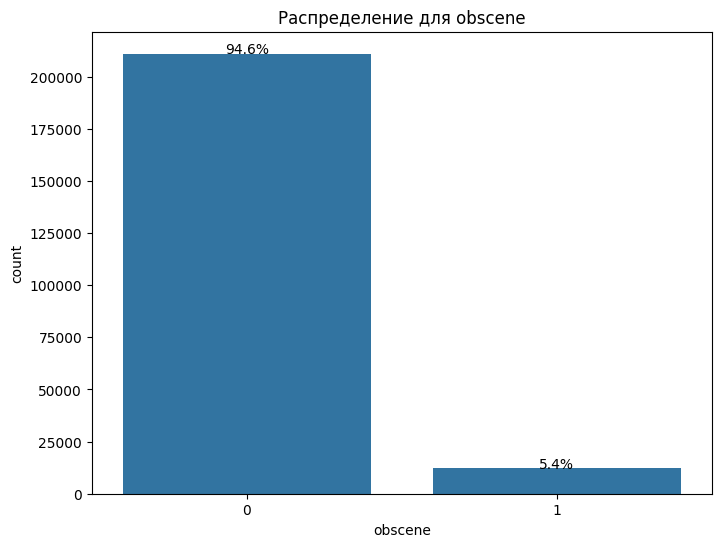

Распределение для obscene:
obscene
0    94.568155
1     5.431845
Name: proportion, dtype: float64


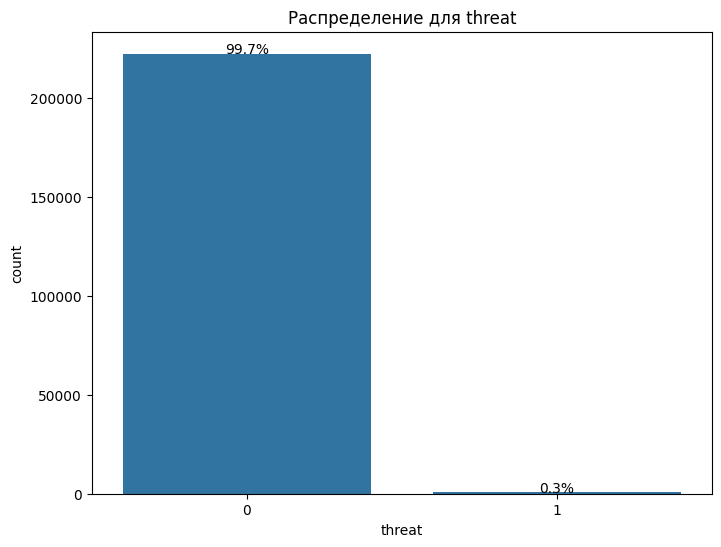

Распределение для threat:
threat
0    99.692579
1     0.307421
Name: proportion, dtype: float64


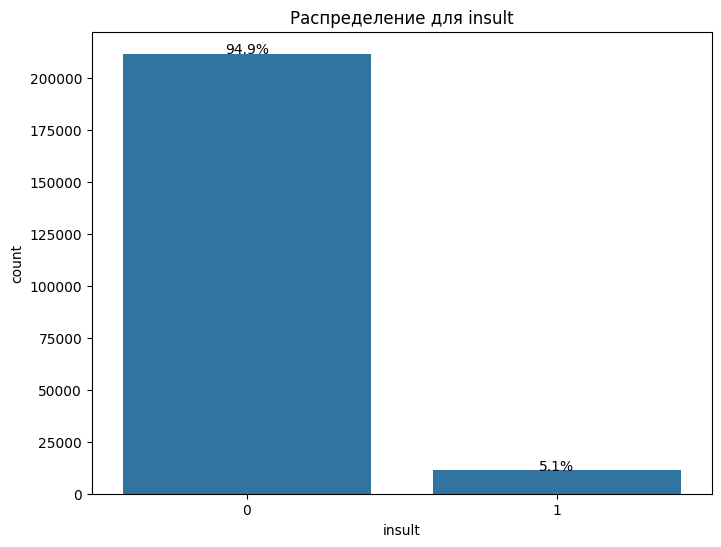

Распределение для insult:
insult
0    94.943244
1     5.056756
Name: proportion, dtype: float64


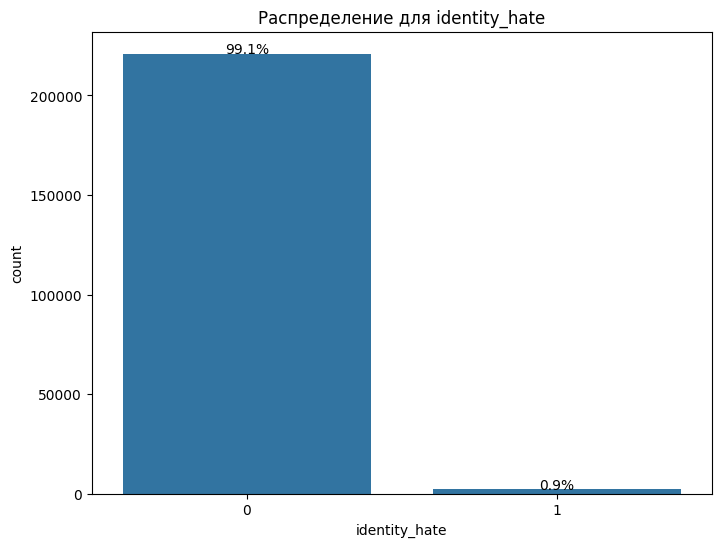

Распределение для identity_hate:
identity_hate
0    99.052194
1     0.947806
Name: proportion, dtype: float64


In [3]:
# Проверьте, есть ли дисбаланс классов (например, если 95% комментариев нетоксичные, а 5% токсичные).
import matplotlib.pyplot as plt
import seaborn as sns

# Список меток
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Построение графиков для каждой метки
for label in labels:
    # Подсчет количества значений для каждого класса
    counts = df[label].value_counts()
    
    # Расчет процентного соотношения
    percentages = df[label].value_counts(normalize=True) * 100
    
    # Построение countplot
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=label, data=df)
    plt.title(f'Распределение для {label}')
    
    # Добавление процентных значений на график
    for p in ax.patches:
        height = p.get_height()
        # Преобразуем p.get_x() в целое число (0 или 1)
        class_index = int(p.get_x() + p.get_width() / 2)
        ax.text(
            p.get_x() + p.get_width() / 2.,  # Позиция по X
            height + 0.1,                    # Позиция по Y (немного выше столбца)
            f'{percentages[class_index]:.1f}%',  # Текст с процентом
            ha='center'                      # Выравнивание по центру
        )
    
    plt.show()
    
    # Вывод процентного соотношения в консоль
    print(f"Распределение для {label}:")
    print(percentages)

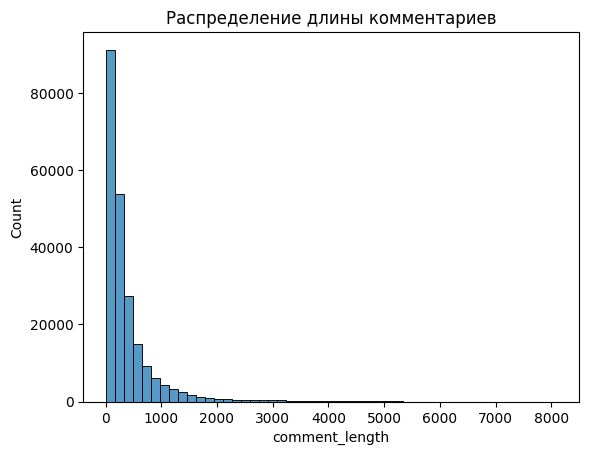

Обобщенные результаты анализа длины комментариев:
count    223112.000000
mean        406.024176
std         610.575754
min           3.000000
25%          97.000000
50%         212.000000
75%         447.250000
max        8095.000000
Name: comment_length, dtype: float64

Минимальная длина комментария: 3
Максимальная длина комментария: 8095
Средняя длина комментария: 406.02
Медианная длина комментария: 212.0


In [21]:
# Изучите длину комментариев
df['comment_length'] = df['comment_text'].apply(len)  # Добавляем столбец с длиной комментария

# Построение гистограммы
sns.histplot(df['comment_length'], bins=50)  # Строим гистограмму
plt.title('Распределение длины комментариев')  # Добавляем заголовок
plt.show()  # Отображаем график

# Печать обобщенных результатов в консоль
print("Обобщенные результаты анализа длины комментариев:")
print(df['comment_length'].describe())  # Основные статистические метрики
print(f"\nМинимальная длина комментария: {df['comment_length'].min()}")  # Минимальная длина
print(f"Максимальная длина комментария: {df['comment_length'].max()}")  # Максимальная длина
print(f"Средняя длина комментария: {df['comment_length'].mean():.2f}")  # Средняя длина
print(f"Медианная длина комментария: {df['comment_length'].median()}")  # Медиана

# Удаляем столбец comment_length после построения графика и анализа
df.drop(columns=['comment_length'], inplace=True)

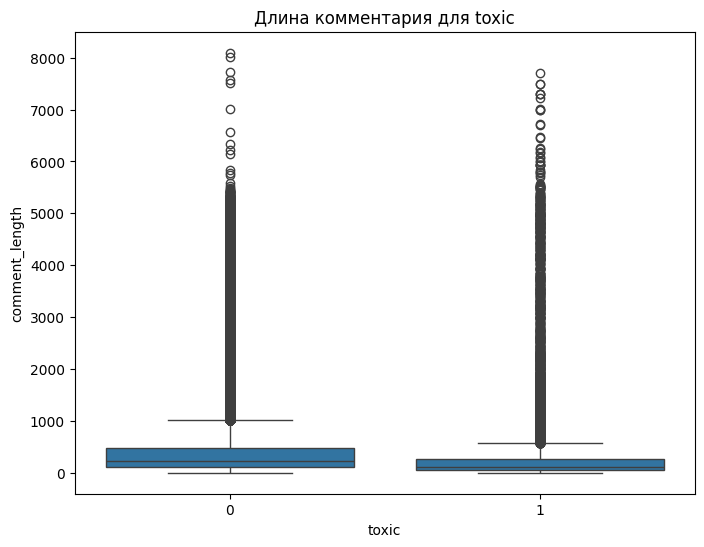

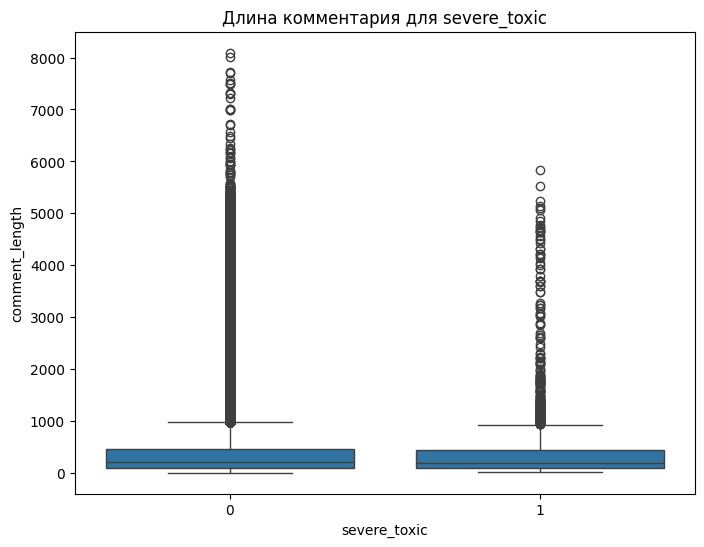

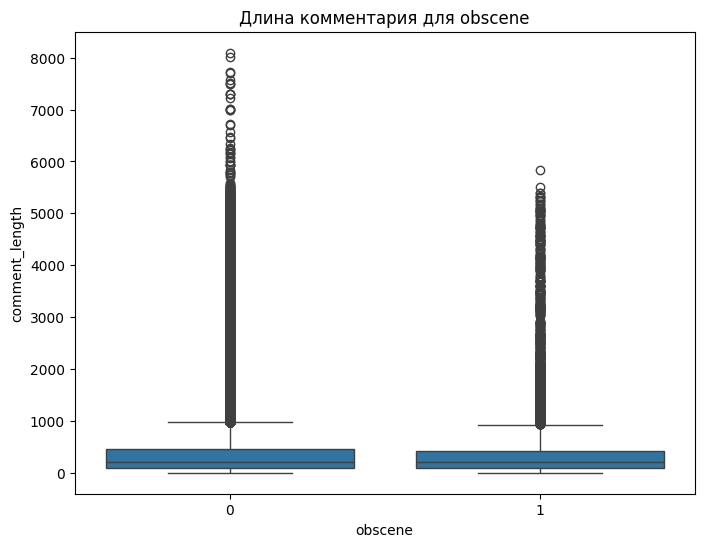

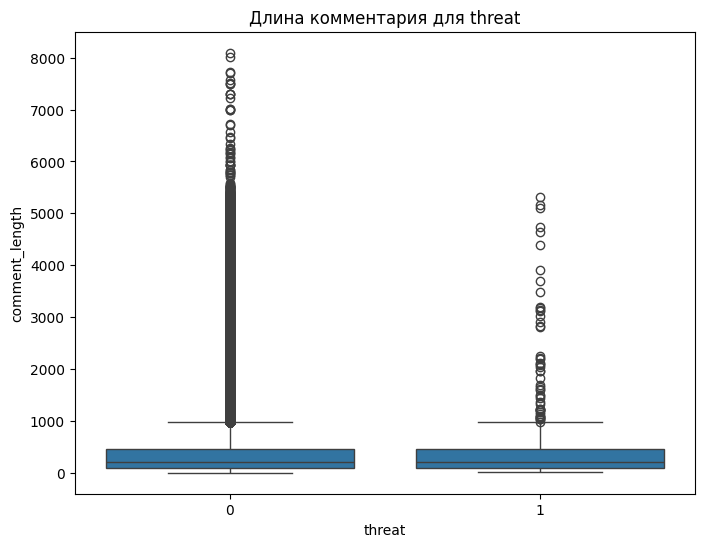

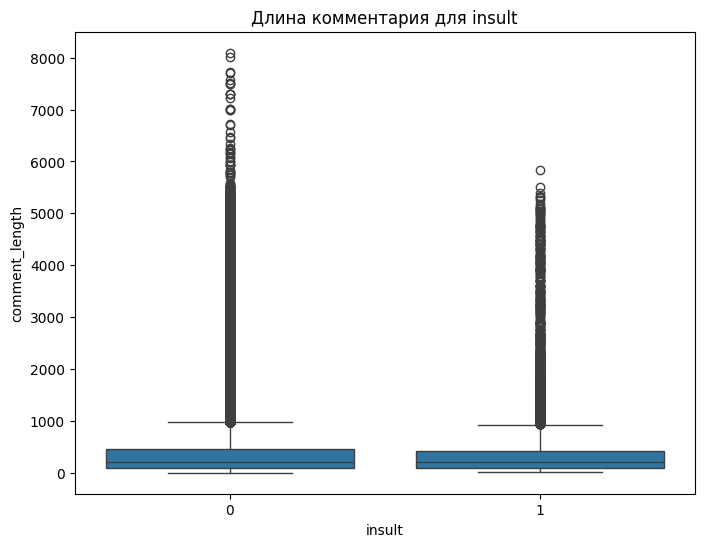

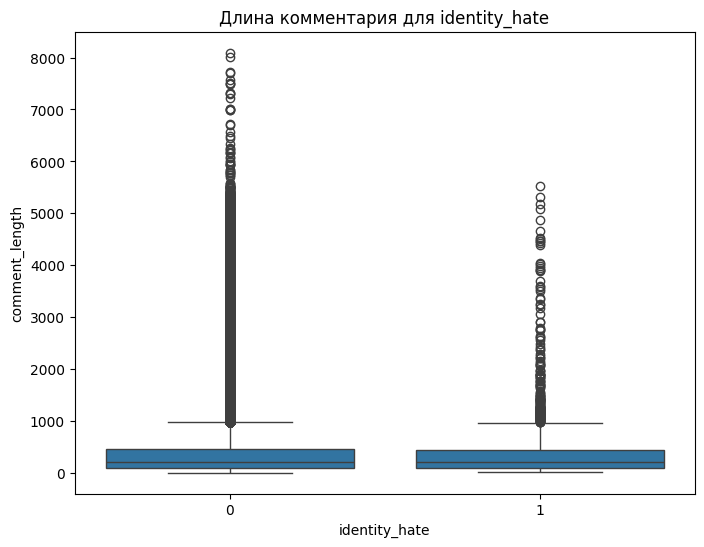

In [5]:
# Добавляем столбец с длиной комментария
df['comment_length'] = df['comment_text'].apply(len)

# Проверка корреляции между длиной комментария и метками
for label in labels:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=label, y='comment_length', data=df)
    plt.title(f'Длина комментария для {label}')
    plt.show()

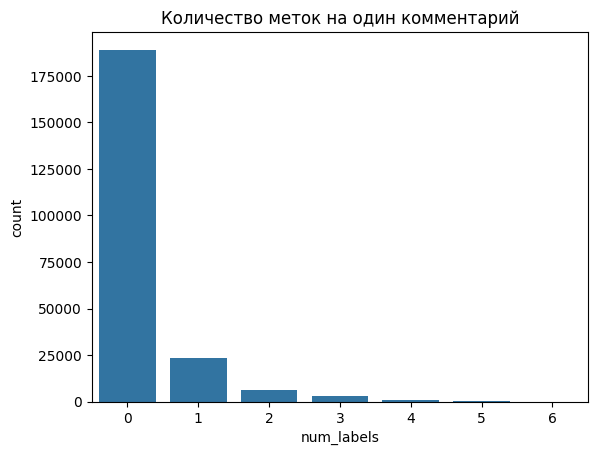

In [6]:
# комментарий может быть одновременно помечен несколькими метками (например, toxic и obscene).
df['num_labels'] = df[labels].sum(axis=1)
sns.countplot(x='num_labels', data=df)
plt.title('Количество меток на один комментарий')
plt.show()

Распределение для любого типа токсичности (any_toxic):
any_toxic
0    0.847656
1    0.152344
Name: proportion, dtype: float64


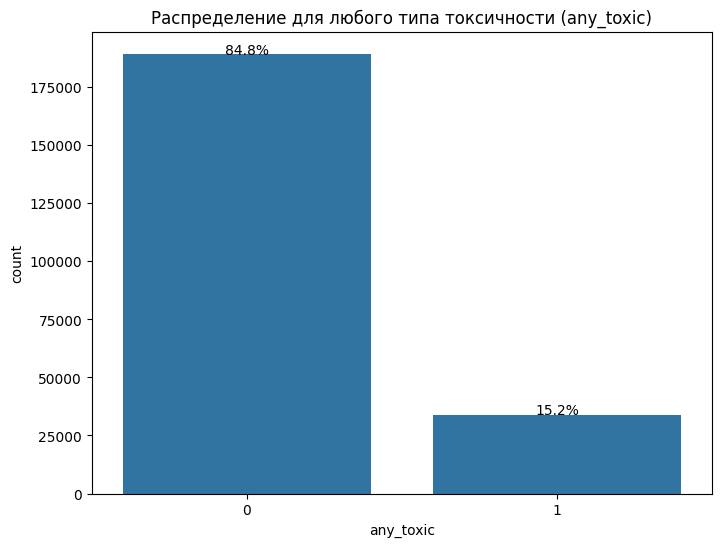

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем новый столбец, который указывает, является ли комментарий токсичным (хотя бы одна метка = 1)
df['any_toxic'] = df[labels].max(axis=1)

# Распределение для суммарного столбца
print("Распределение для любого типа токсичности (any_toxic):")
print(df['any_toxic'].value_counts(normalize=True))  # Процентное соотношение

# Визуализация с процентами на столбиках
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='any_toxic', data=df)
plt.title('Распределение для любого типа токсичности (any_toxic)')

# Добавление процентных значений на столбики
for p in ax.patches:
    height = p.get_height()  # Высота столбика
    percentage = (height / len(df)) * 100  # Процентное соотношение
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Позиция по X (центр столбика)
        height + 0.1,                    # Позиция по Y (немного выше столбика)
        f'{percentage:.1f}%',            # Текст с процентом
        ha='center'                      # Выравнивание по центру
    )

plt.show()

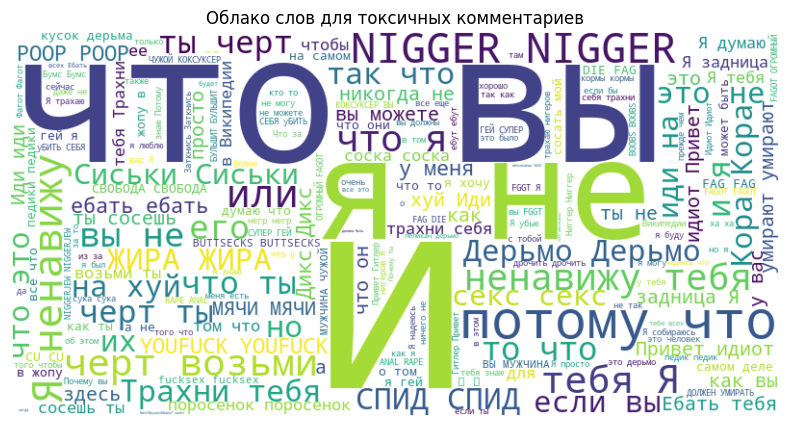

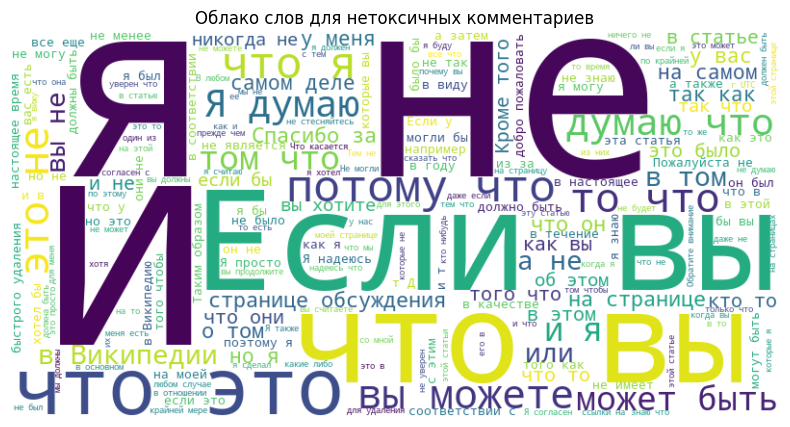

In [8]:
from wordcloud import WordCloud

# Функция для построения облака слов
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Тексты для токсичных и нетоксичных комментариев
toxic_text = ' '.join(df[df['toxic'] == 1]['comment_text'])
non_toxic_text = ' '.join(df[df['toxic'] == 0]['comment_text'])

# Облако слов для токсичных комментариев
generate_wordcloud(toxic_text, 'Облако слов для токсичных комментариев')

# Облако слов для нетоксичных комментариев
generate_wordcloud(non_toxic_text, 'Облако слов для нетоксичных комментариев')

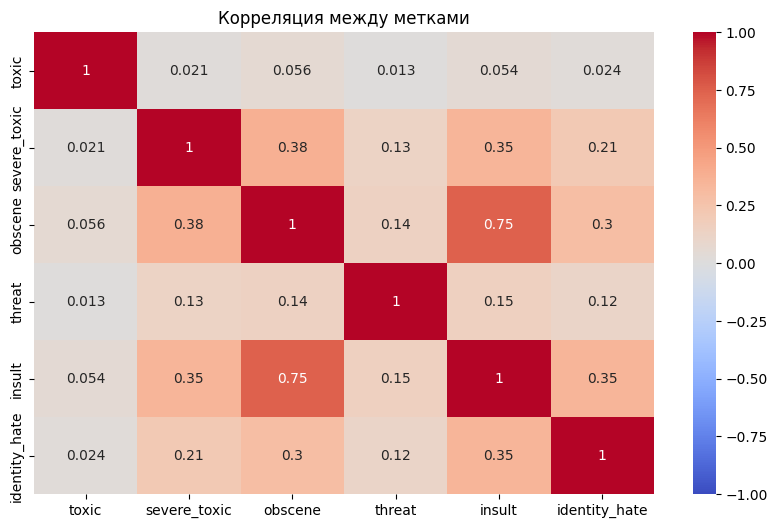

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Список меток
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Тепловая карта корреляций
plt.figure(figsize=(10, 6))
sns.heatmap(df[labels].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между метками')
plt.show()

C:\Users\bokar\AppData\Local\Temp\ipykernel_34388\1682982868.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_percentages.index, y=label_percentages.values, palette='viridis')


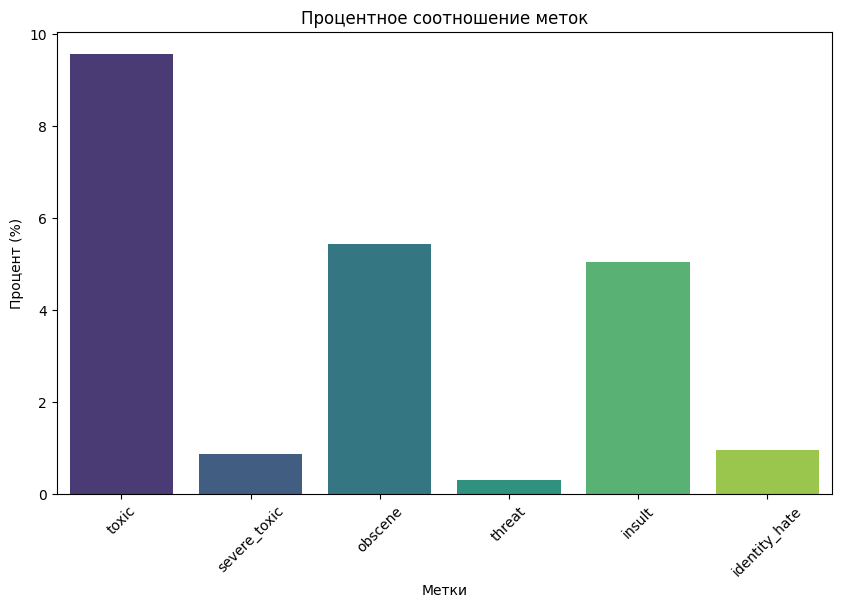

toxic            9.573062
severe_toxic     0.878345
obscene          5.431845
threat           0.307421
insult           5.056756
identity_hate    0.947806
dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Список меток
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Расчет процентного соотношения для каждой метки
label_percentages = df[labels].mean() * 100

# Визуализация в виде bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=label_percentages.index, y=label_percentages.values, palette='viridis')
plt.title('Процентное соотношение меток')
plt.ylabel('Процент (%)')
plt.xlabel('Метки')
plt.xticks(rotation=45)
plt.show()

# Вывод процентного соотношения
print(label_percentages)

C:\Users\bokar\AppData\Local\Temp\ipykernel_34388\1459670925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


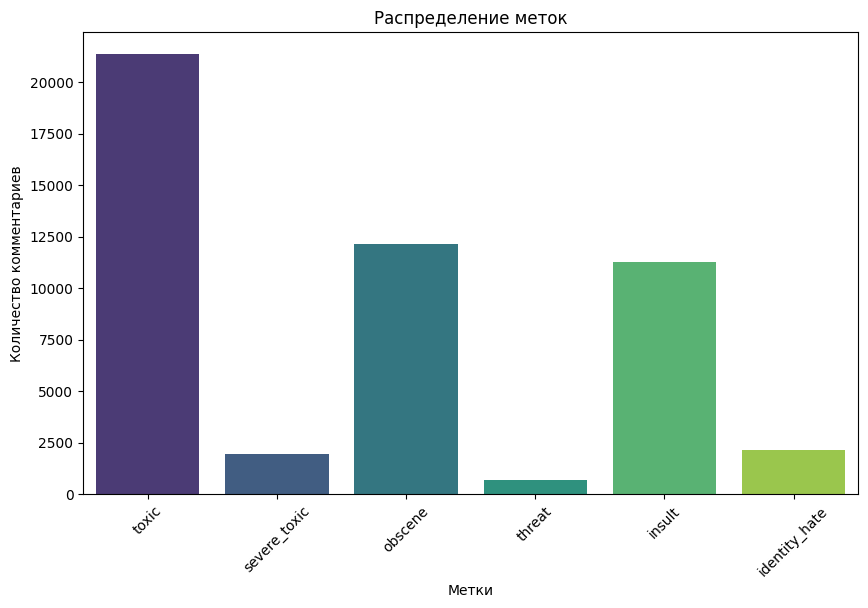

toxic            21362
severe_toxic      1960
obscene          12121
threat             686
insult           11284
identity_hate     2115
dtype: int64


In [11]:
# Подсчет количества комментариев для каждой метки
label_counts = df[labels].sum()

# Визуализация в виде bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Распределение меток')
plt.ylabel('Количество комментариев')
plt.xlabel('Метки')
plt.xticks(rotation=45)
plt.show()

# Вывод количества комментариев для каждой метки
print(label_counts)

In [12]:
import string
import pandas as pd
from natasha import MorphVocab, Doc, Segmenter, NewsMorphTagger, NewsEmbedding

# Загрузка стоп-слов для русского языка (используем NLTK)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Инициализация компонентов Natasha
segmenter = Segmenter()  # Для токенизации и сегментации текста
emb = NewsEmbedding()  # Загрузка модели для морфологического анализа
morph_tagger = NewsMorphTagger(emb)  # Для морфологического анализа
morph_vocab = MorphVocab()  # Для лемматизации

# Функция для предобработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    
    # Удаление пунктуации
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Удаление стоп-слов
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Лемматизация с использованием Natasha
    doc = Doc(text)
    doc.segment(segmenter)  # Токенизация
    doc.tag_morph(morph_tagger)  # Морфологический анализ
    
    # Извлечение лемм
    for token in doc.tokens:
        token.lemmatize(morph_vocab)  # Лемматизация каждого токена
    lemmas = [token.lemma for token in doc.tokens]
    text = ' '.join(lemmas)
    
    return text


# Применение функции к столбцу с комментариями
df['comment_text_cleaned'] = df['comment_text'].apply(preprocess_text)

# Просмотр результата
print(df[['comment_text', 'comment_text_cleaned']].head())

# Удаление ненужных столбцов, если они есть
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True, errors='ignore')

# 1. Просмотр первых нескольких строк данных
print("Первые 5 строк данных:")
print(df.head())

# 2. Проверка размерности данных
print("\nРазмерность данных (строки, столбцы):")
print(df.shape)

# 3. Типы данных и наличие пропущенных значений
print("\nИнформация о данных:")
print(df.info())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bokar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        comment_text  \
0  D'Оо! Он соответствует этому цвету фона, с кот...   
1  "\n\nПоздравляю и меня, хорошо использую инстр...   
2  Смысл Mitsurugi не имеет смысла - почему бы не...   
3  О, и девушка выше начала свои споры со мной. О...   
4  До свидания!\nНе смотри, приходи или думай о в...   

                                comment_text_cleaned  
0  d оо соответствовать этот цвет фон который пох...  
1  поздравлять использовать инструмент · разговар...  
2  смысл mitsurugi иметь смысл почему поспорить в...  
3  девушка выше начать свой спор я сунуть нос туд...  
4  свидание смотреть приходить думать возвращение...  
Первые 5 строк данных:
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  D'Оо! Он соответствует этому цвету фона, с кот...      0   
1  00025465d4725e87  "\n\nПоздравляю и меня, хорошо использую инстр...      0   
2  0009801bd85e5806  Смысл Mitsurugi не имеет смысла - почему бы не

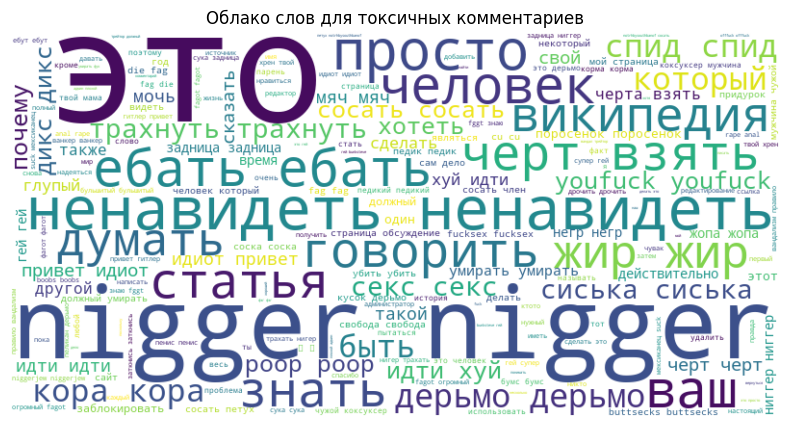

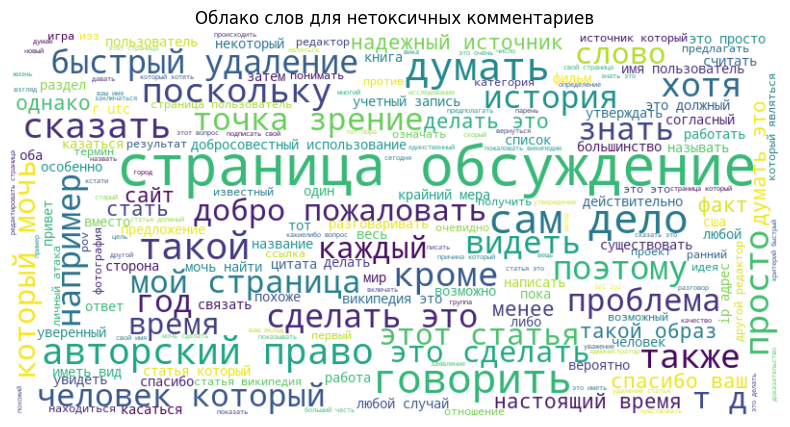

In [13]:
from wordcloud import WordCloud

# Функция для построения облака слов
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Тексты для токсичных и нетоксичных комментариев
toxic_text = ' '.join(df[df['toxic'] == 1]['comment_text_cleaned'])
non_toxic_text = ' '.join(df[df['toxic'] == 0]['comment_text_cleaned'])

# Облако слов для токсичных комментариев
generate_wordcloud(toxic_text, 'Облако слов для токсичных комментариев')

# Облако слов для нетоксичных комментариев
generate_wordcloud(non_toxic_text, 'Облако слов для нетоксичных комментариев')

In [14]:
# Проверка на дубликаты по столбцу comment_text
duplicates_comment_text = df[df.duplicated('comment_text', keep=False)]
print(f"Найдено дубликатов по comment_text: {len(duplicates_comment_text)}")

# Проверка на дубликаты по столбцу comment_text_cleaned
duplicates_comment_text_cleaned = df[df.duplicated('comment_text_cleaned', keep=False)]
print(f"Найдено дубликатов по comment_text_cleaned: {len(duplicates_comment_text_cleaned)}")

# Удаление дубликатов по столбцу comment_text
#df = df.drop_duplicates(subset='comment_text', keep='first')
#print(f"Данные после удаления дубликатов по comment_text: {len(df)} строк")

# Удаление дубликатов по столбцу comment_text_cleaned
#df = df.drop_duplicates(subset='comment_text_cleaned', keep='first')
#print(f"Данные после удаления дубликатов по comment_text_cleaned: {len(df)} строк")

Найдено дубликатов по comment_text: 421
Найдено дубликатов по comment_text_cleaned: 2610


In [15]:
# Проверка на пустые значения
empty_values = df[df['comment_text'].str.strip() == '']
print(f"Найдено пустых строк: {len(empty_values)}")

# Удаление пустых строк
df = df[df['comment_text'].str.strip() != '']
print(f"Данные после удаления пустых строк: {len(df)} строк")

Найдено пустых строк: 0
Данные после удаления пустых строк: 223147 строк


In [16]:
def find_short_comments(df, column='comment_text_cleaned', min_length=2):
    """
    Находит комментарии короче чем min_length символов.

    Параметры:
    df (pd.DataFrame): DataFrame с данными.
    column (str): Название столбца с текстом комментариев.
    min_length (int): Минимальная допустимая длина комментария.

    Возвращает:
    pd.DataFrame: DataFrame с комментариями короче min_length символов.
    """
    # Находим комментарии короче min_length символов
    short_comments = df[df[column].str.len() < min_length]
    
    return short_comments

short_comments = find_short_comments(df, column='comment_text_cleaned', min_length=2)

# Вывод результата
print(f"Найдено комментариев короче 2 символов: {len(short_comments)}")
print(short_comments)

df = df[df['comment_text'].str.len() >= 2]
print(f"Данные после удаления коротких комментариев: {len(df)} строк")

Найдено комментариев короче 2 символов: 70
                      id            comment_text  toxic  severe_toxic  \
2406    067638a445ccd93b   Здесь, здесь и здесь.      0             0   
3118    086b460a0eec5331           Конечно. Вот.      0             0   
9388    18ed60f8e586bcbd      Они тоже. их ... -      0             0   
13576   23d96456ba59bd2b  о нет у нас нет !!!!!!      0             0   
17384   2de2cd1ef6ceaf3b     (кто лучше, чем ты)      0             0   
...                  ...                     ...    ...           ...   
217156  e7c5115a36481a48                     | |      0             0   
217431  e8c942f22a84b9ca                       ~      0             0   
220227  f411e9fcfd96f70f             :( (((('' |      0             0   
221060  f762084e12bbac29                     | |      0             0   
221844  faa0510471f87cb7                      ()      0             0   

        obscene  threat  insult  identity_hate  comment_length  num_labels  \
24

In [17]:
%pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 4.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import re
from sqlalchemy import create_engine

# Словарь для замены символов
replacements = {
    "1": "и", "!": "и", "|": "и", "0": "о", "@": "а", "$": "с", "#": "х", "%": "п",
    "&": "и", "*": "", "(": "", ")": "", "-": "", "_": "", ".": "", ",": ""
}

# Функция для замены символов
def replace_special_chars(text):
    for char, replacement in replacements.items():
        text = text.replace(char, replacement)
    return text

# Функция для удаления лишних символов и смайликов
def remove_extra_chars(text):
    # Удаляем смайлики и лишние символы
    text = re.sub(r"[^\w\s]", "", text)  # Удаляем всё, кроме букв, цифр и пробелов
    text = re.sub(r"\s+", " ", text)  # Удаляем лишние пробелы
    return text.strip()

# Функция для нормализации текста
def normalize_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    # Заменяем спецсимволы
    text = replace_special_chars(text)
    # Удаляем лишние символы и смайлики
    text = remove_extra_chars(text)
    return text

# Основная функция для обработки текста
def preprocess_text(text):
    # Нормализация текста
    text = normalize_text(text)

# Применяем обработку текста
df["comment_text_cleaned"] = df["comment_text"].apply(preprocess_text)

# Вывод результата
print(df)



                      id                                       comment_text  \
0       000103f0d9cfb60f  D'Оо! Он соответствует этому цвету фона, с кот...   
1       00025465d4725e87  "\n\nПоздравляю и меня, хорошо использую инстр...   
2       0009801bd85e5806  Смысл Mitsurugi не имеет смысла - почему бы не...   
3       00070ef96486d6f9  О, и девушка выше начала свои споры со мной. О...   
4       0007e25b2121310b  До свидания!\nНе смотри, приходи или думай о в...   
...                  ...                                                ...   
223142  fff8f521a7dbcd47     закрыл мексиканскую границу, не выглядел плохо   
223143  fffac2a094c8e0e2  Мэл Гибсон - нацистская сучка, которая делает ...   
223144  fff8f64043129fa2  : Джером, я вижу, ты никогда не удосужился к э...   
223145  fffa8a11c4378854  == позор вам всем !!! ==\n\n Вы хотите говорит...   
223146  fff718ffe5f05559  Я только что обнаружил еще один список: список...   

        toxic  severe_toxic  obscene  threat  insul

In [19]:
import re

# Функция для проверки, состоит ли текст только из спецсимволов или цифр
def is_special_or_numeric(text):
    # Регулярное выражение для поиска символов, не являющихся буквами
    return bool(re.match(r'^[\W\d_]+$', text))

# Находим комментарии, состоящие только из спецсимволов или цифр
special_or_numeric_comments = df[df['comment_text'].apply(is_special_or_numeric)]

# Выводим первые 5 строк для удаления
print("\nПервые 5 комментариев для удаления (только спецсимволы/цифры):")
print(special_or_numeric_comments.head())

# Удаляем такие комментарии
df = df[~df['comment_text'].apply(is_special_or_numeric)]
print(f"Данные после удаления комментариев с спецсимволами/цифрами: {len(df)} строк")


Первые 5 комментариев для удаления (только спецсимволы/цифры):
                     id                                       comment_text  \
4474   0bed2196c873636d  1993\n\n1994\n\n1995\n\n1996\n\n1997\n\n1998\n...   
6283   10d0c3263b52a057                                193.61.111.53 15:00   
17300  2db3383cc656e1a0                                ~\n\n68.193.147.157   
52401  8c4c53001134f290                                             14:53,   
53743  8fb2aaf04e93061a                    92.24.199.233 | 92.24.199.233]]   

       toxic  severe_toxic  obscene  threat  insult  identity_hate  \
4474       0             0        0       0       0              0   
6283       0             0        0       0       0              0   
17300      0             0        0       0       0              0   
52401      0             0        0       0       0              0   
53743      0             0        1       0       1              0   

       comment_length  num_labels  any_toxic c

In [20]:
import re

# Функция для удаления некорректных символов из текста
def remove_invalid_chars(text):
    # Регулярное выражение для поиска и удаления некорректных символов
    return re.sub(r'[^\x00-\x7Fа-яА-ЯёЁ]', '', text)

# Применяем функцию к столбцу comment_text
df['comment_text'] = df['comment_text'].apply(remove_invalid_chars)

# Проверяем результат
print("Первые 5 строк после очистки от некорректных символов:")
print(df.head())

Первые 5 строк после очистки от некорректных символов:
                 id                                       comment_text  toxic  \
0  000103f0d9cfb60f  D'Оо! Он соответствует этому цвету фона, с кот...      0   
1  00025465d4725e87  "\n\nПоздравляю и меня, хорошо использую инстр...      0   
2  0009801bd85e5806  Смысл Mitsurugi не имеет смысла - почему бы не...      0   
3  00070ef96486d6f9  О, и девушка выше начала свои споры со мной. О...      0   
4  0007e25b2121310b  До свидания!\nНе смотри, приходи или думай о в...      1   

   severe_toxic  obscene  threat  insult  identity_hate  comment_length  \
0             0        0       0       0              0             121   
1             0        0       0       0              0              69   
2             0        0       0       0              0             138   
3             0        0       0       0              0             210   
4             0        0       0       0              0              64   

   num_

In [ ]:
# Сохранение в базу данных
# Пример для SQLite
engine = create_engine("sqlite:///cleaned_comments.db")
df.to_sql("cleaned_comments", engine, if_exists="replace", index=False)